<a href="https://colab.research.google.com/github/DaThabor/ResearchProposal/blob/master/TestRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load, Transform and Prepare Data Set for Final Modelling for Master Thesis
January 2020
Thabor Walbeek

# Prepare Environment

In [0]:
print("---Start of reading python notebook")
print("---Start preparing of the environment")

# Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from scipy import stats
from pandas import Series 
from numpy import array
from matplotlib import pyplot 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import CuDNNLSTM
from keras.models import load_model
print("---End preparing of environment")

---Start of reading python notebook
---Start preparing of the environment


Using TensorFlow backend.


---End preparing of environment


# Get Data

In [0]:
# Get the full data set
print("---Start getting the data")
data = pd.read_excel("/content/drive/My Drive/FinalSetCombined.xlsx")
print("---Data retrieved")

---Start getting the data
---Data retrieved


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Clean Data

In [0]:
print("---Start cleaning the data")
print("---Set normalization parameters")
## Remove first column with ID values
dataclean = pd.DataFrame(data[data.columns[1:21]])
# Check for the minimum and maximum values in the data set
minvalue = min(dataclean.min())
maxvalue = max(dataclean.max())
denominator = maxvalue - minvalue

# Set rounding parameter
rounding = 3
denominator = round(denominator,rounding)
print("---Normalization preparation is done")

---Start cleaning the data
---Set normalization parameters
---Normalization preparation is done


In [0]:
print("---Start normalization")
# Normalize the data based on the denominator value
length = len(dataclean)
normdata = pd.DataFrame(index=range(0,length),columns=range(0,21), dtype='float')

for i in range(0,length,1):
    if i in dataclean.index:
      for j in range(0,21,1):
        locdata = dataclean.loc[i][j-1]
        normalized = (locdata - minvalue) / denominator
        normalized = getattr(normalized, "tolist", lambda: normalized)()
        normdata.loc[i][j] = normalized
    else:
      pass

## Remove first column with ID values
normdata = pd.DataFrame(normdata[normdata.columns[1:21]])

print("---End normalization")
print("---Data is clean")
print("---Notebook done")

---Start normalization
---End normalization
---Data is clean
---Notebook done


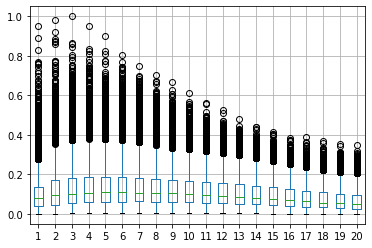

In [0]:
normdata.boxplot()